In [66]:
import pandas as pd
import numpy as np
import plotly.express as pltx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import scipy.stats as stats
import optuna
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv("D:\\Praxis_DataScience_JAN-SEPT\\Projects\\insurance.csv")

In [3]:
print('dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

dataframe has 1338 rows & 7 columns


In [4]:
df.head(5)

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.tail(5)

,Age,Gender,BMI,Children,Smoker,Region,Expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Expenses'], dtype='object')

In [9]:
categorical_columns=df.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [10]:
numeric_columns=df.select_dtypes(include=np.number).columns
numeric_columns

Index(['Age', 'BMI', 'Children', 'Expenses'], dtype='object')

In [11]:
df["Gender"] = df["Gender"].astype("category")
df["Smoker"] = df["Smoker"].astype("category")
df["Region"] = df["Region"].astype("category")

In [12]:
df.dtypes

Age            int64
Gender      category
BMI          float64
Children       int64
Smoker      category
Region      category
Expenses     float64
dtype: object

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
BMI,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
Children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
Expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


### Describe provides a summary of the features, such as:

1) Count: Count displays how many records there are.

2) Mean: average measurement

3) Standard Deviation: The standard deviation provides information about a feature's variability; typically, a larger standard deviation indicates that the feature's values are dispersed and off the mean, whereas a smaller standard deviation indicates that the data points are more tightly clustered.

4) Minimum: The feature's lowest value

5) Maximum: The maximum value denotes the feature's highest value.

6) 25% of the total falls under Q1.

7) Middle 50% of the variable, 50% | Median.

8) 75% | Q3: 75% of the value is below Q3.

In [14]:
Target_range = df["Expenses"].max() - df["Expenses"].min()
Target_range

62648.56

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

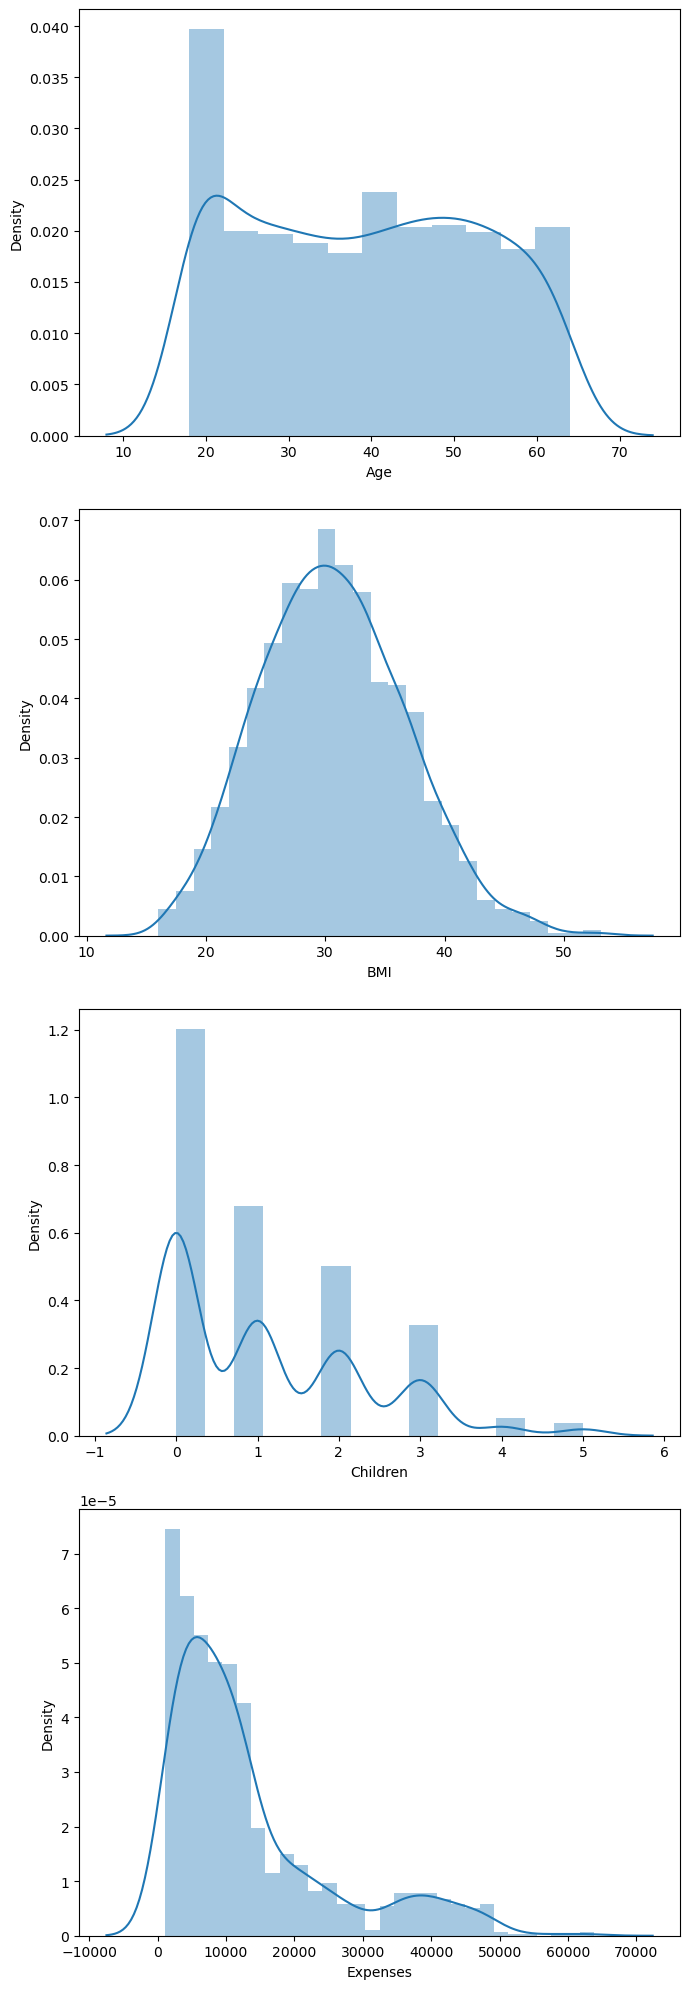

In [15]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(7, 5*len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

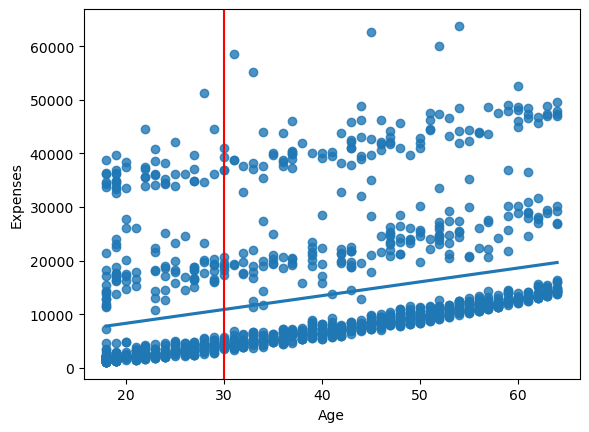

In [16]:
fig=sns.regplot(x='Age', y='Expenses', data=df,ci=None)
fig.axvline(30, color='r')

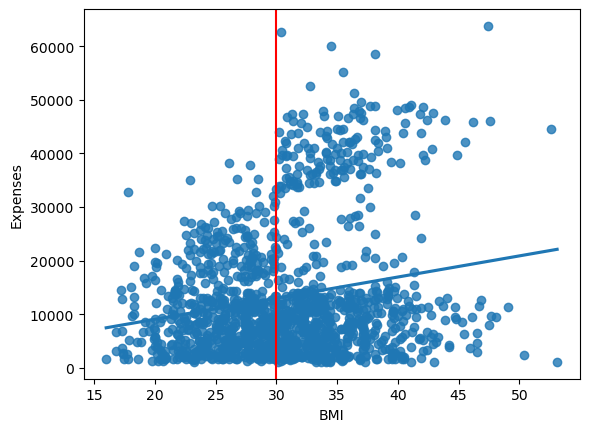

In [17]:
fig=sns.regplot(x='BMI', y='Expenses', data=df,ci=None)
fig.axvline(30, color='r')

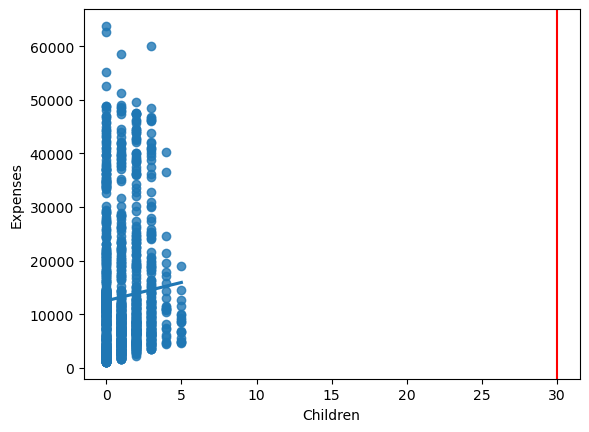

In [18]:
fig=sns.regplot(x='Children', y='Expenses', data=df,ci=None)
fig.axvline(30, color='r')

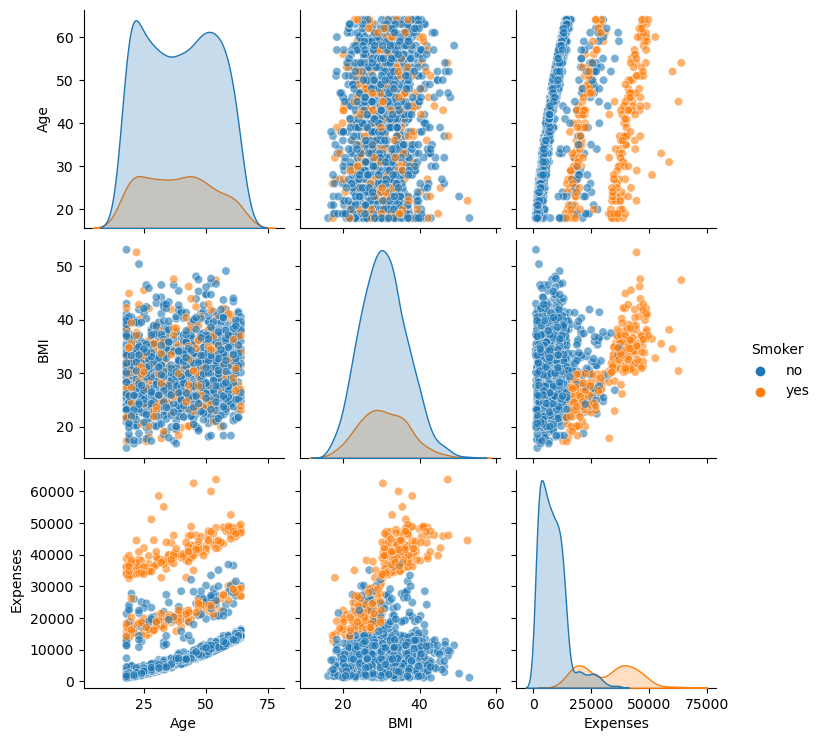

In [19]:
sns.pairplot(data=df[["Age", "BMI", "Expenses", "Smoker"]],
             hue="Smoker",
             vars=["Age", "BMI", "Expenses"],
             plot_kws={"alpha": 0.6})
# Show the plot
plt.show()

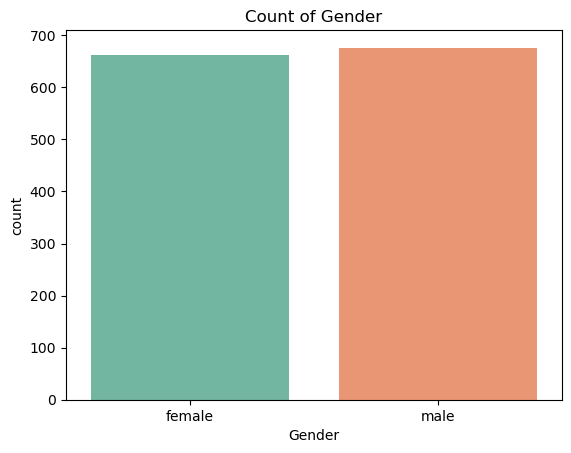

In [20]:
# Create a countplot
sns.countplot(data=df, x='Gender',  palette='Set2')
# Set the title
plt.title('Count of Gender')
# Show the plot
plt.show()

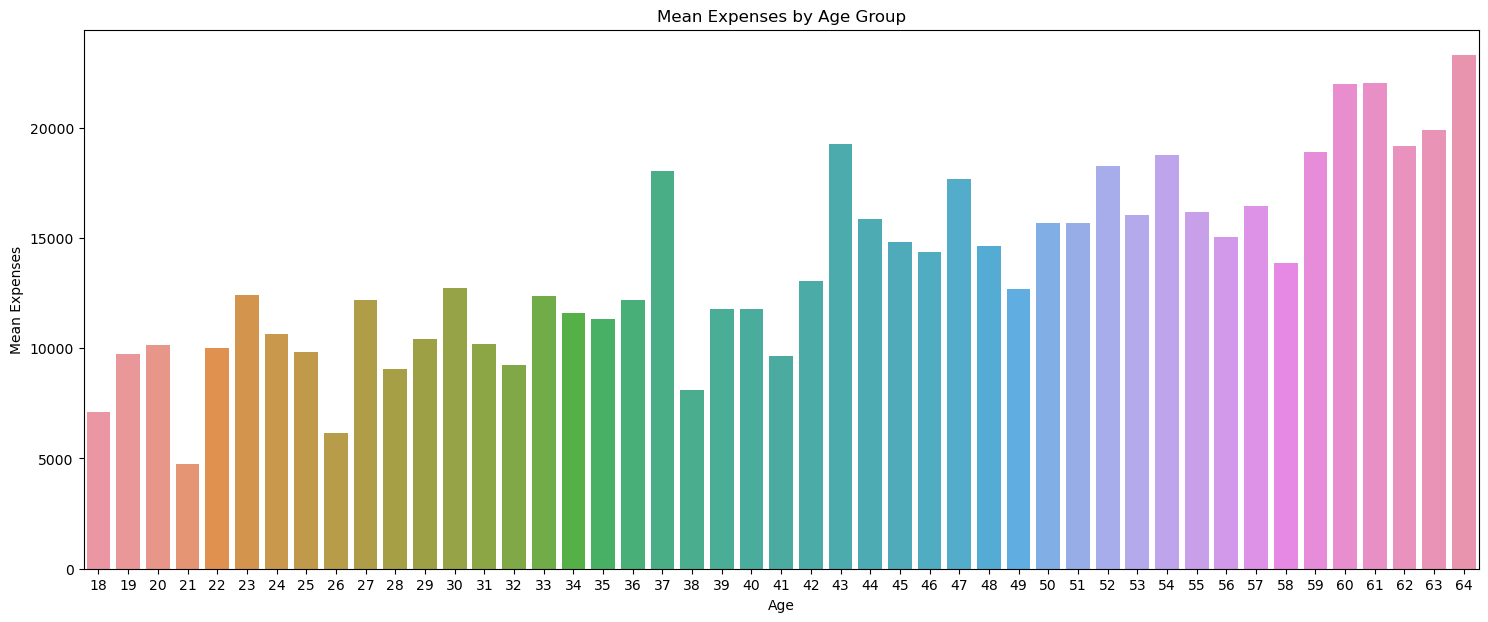

In [21]:
mean_expenses = df.groupby(by='Age')['Expenses'].mean().reset_index()

plt.figure(figsize=(18, 7))
# Create a bar chart using Seaborn
sns.barplot(data=mean_expenses, x='Age', y='Expenses')


# Set the title and axis labels
plt.title('Mean Expenses by Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Expenses')

# Show the plot
plt.show()

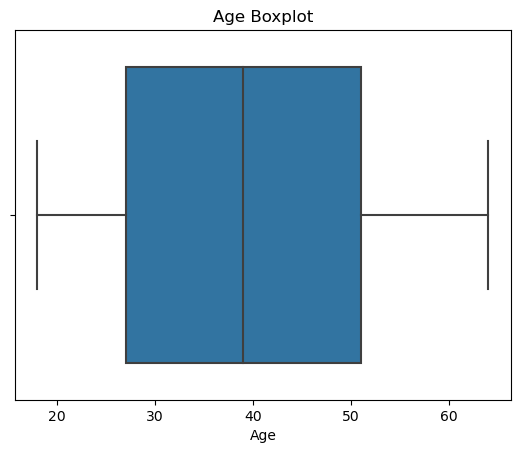

In [22]:
sns.boxplot(data=df, x='Age')

# Set the title
plt.title('Age Boxplot')

# Show the plot
plt.show()








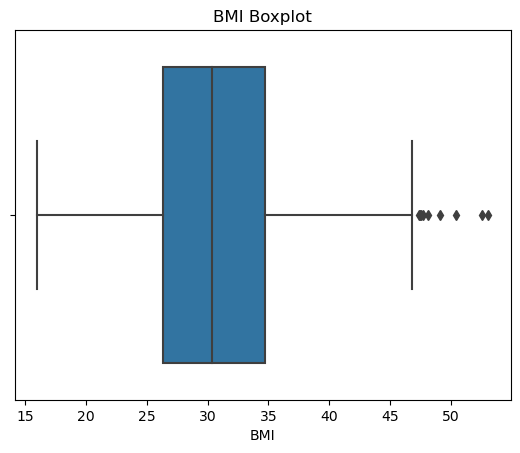

In [23]:
sns.boxplot(data=df, x='BMI')

# Set the title
plt.title('BMI Boxplot')

# Show the plot
plt.show()

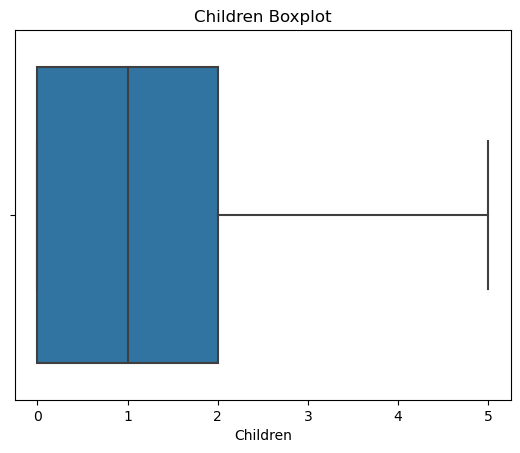

In [24]:
sns.boxplot(data=df, x='Children')

# Set the title
plt.title('Children Boxplot')

# Show the plot
plt.show()

In [25]:
def outlier_findings(features):
    quantile1, quantile3= np.percentile(features,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(features < lower_bound_val)
    upper_outliers = np.where(features > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))

In [26]:
outlier_findings(df["Children"])

Quartile 1 : 0.0 Quartile 3 : 2.0
Inter Quartile Range : 2.0
Min Whisker : -3.0 Max Whiker : 5.0
Number of values below the lower bound: 0
Number of values above the upper bound: 0


In [27]:
outlier_findings(df["Age"])

Quartile 1 : 27.0 Quartile 3 : 51.0
Inter Quartile Range : 24.0
Min Whisker : -9.0 Max Whiker : 87.0
Number of values below the lower bound: 0
Number of values above the upper bound: 0


In [28]:
outlier_findings(df["BMI"])

Quartile 1 : 26.3 Quartile 3 : 34.7
Inter Quartile Range : 8.400000000000002
Min Whisker : 13.699999999999998 Max Whiker : 47.300000000000004
Number of values below the lower bound: 0
Number of values above the upper bound: 9


In [29]:
for i in numeric_columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

In [30]:
outlier_findings(df["BMI"])

Quartile 1 : 26.3 Quartile 3 : 34.7
Inter Quartile Range : 8.400000000000002
Min Whisker : 13.699999999999998 Max Whiker : 47.300000000000004
Number of values below the lower bound: 0
Number of values above the upper bound: 0


In [31]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64

In [32]:
correlation =df.corr()
correlation

,Age,BMI,Children,Expenses
Age,1.000000,0.111996,0.042469,0.313394
BMI,0.111996,1.000000,0.013580,0.161171
Children,0.042469,0.013580,1.000000,0.073074
Expenses,0.313394,0.161171,0.073074,1.000000


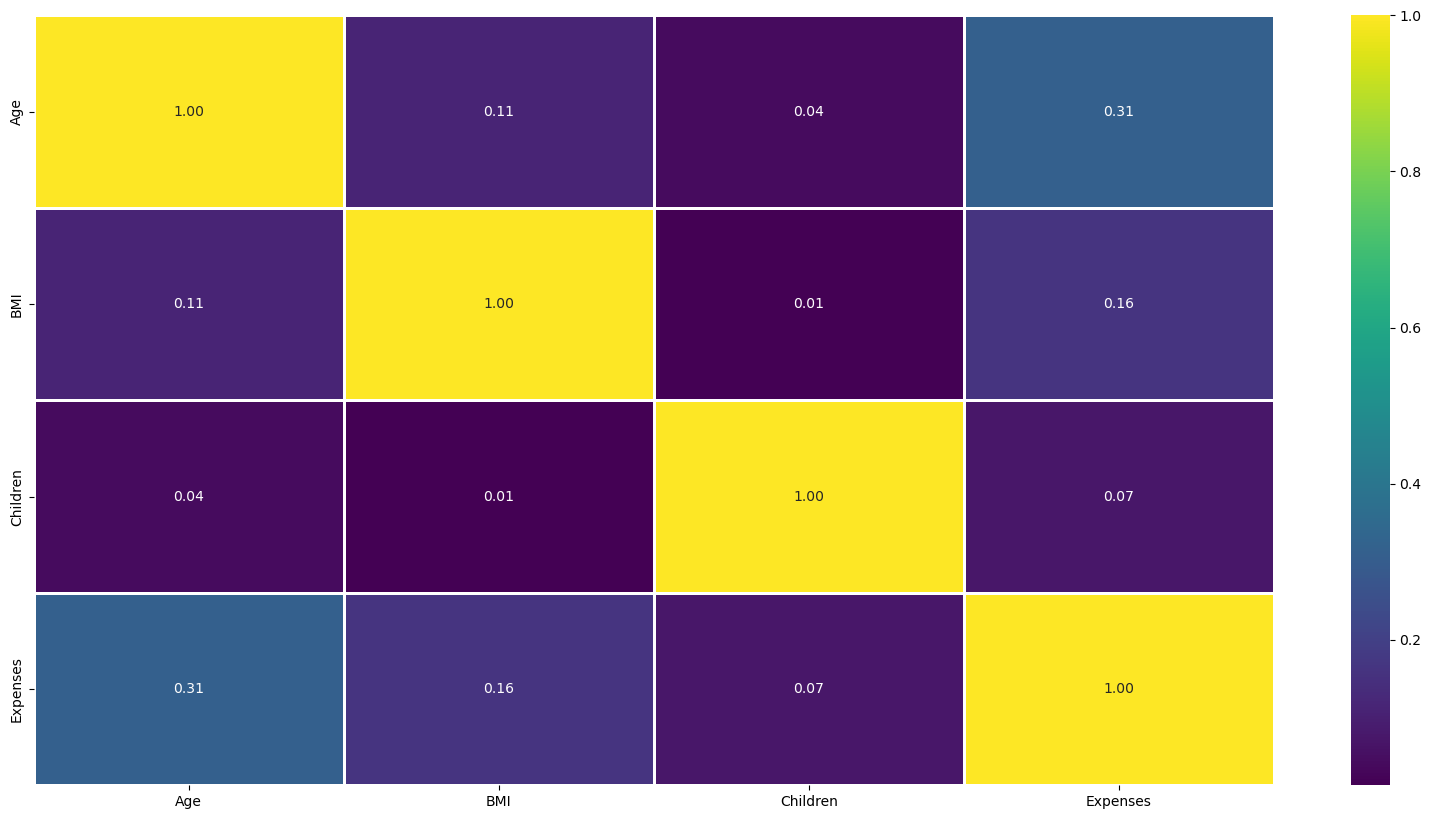

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show()

In [34]:
# the independent variables set
X = df[[ 'Age', 'BMI','Children']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0       Age  7.571701
1       BMI  7.888029
2  Children  1.797212


In [35]:
df2=df.copy()

In [36]:
df2=pd.get_dummies(df2,columns=categorical_columns,drop_first=False)

In [37]:
df2.columns

Index(['Age', 'BMI', 'Children', 'Expenses', 'Gender_female', 'Gender_male',
       'Smoker_no', 'Smoker_yes', 'Region_northeast', 'Region_northwest',
       'Region_southeast', 'Region_southwest'],
      dtype='object')

In [38]:
X = df2.drop("Expenses", axis = 1)

In [39]:
y = df2["Expenses"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [54]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [55]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
p_values = results.pvalues
selected_features = X_train.columns[p_values <= 0.05]
X_train_filtered = X_train[selected_features]
model_filtered = sm.OLS(y_train, X_train_filtered)
results_filtered = model_filtered.fit()
print(results_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:               Expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     497.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.62e-304
Time:                        13:31:59   Log-Likelihood:                -10667.
No. Observations:                1070   AIC:                         2.135e+04
Df Residuals:                    1063   BIC:                         2.138e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1291.7036    630.737  

#### Interpretation of the results:

1. R-squared: The R-squared value indicates the proportion of variance in the dependent variable (Expenses) that can be explained by the independent variables (Age, BMI, Children, Smoker). In this case, the R-squared is 0.766, which means approximately 76.6% of the variance in Expenses can be explained by the independent variables.

2. Adjusted R-squared: The adjusted R-squared value adjusts the R-squared value based on the number of independent variables and the sample size. It is a more conservative measure of the model's goodness of fit. In this case, the adjusted R-squared is 0.762, which is slightly lower than the R-squared value.

3. F-statistic and Prob (F-statistic): The F-statistic assesses the overall significance of the model. It tests the null hypothesis that all the coefficients in the model are zero. A low p-value (in this case, 2.60e-81) indicates that the model as a whole is statistically significant.

4. Coefficients: The coefficients represent the estimated effect of each independent variable on the dependent variable. They indicate the average change in the dependent variable associated with a one-unit change in the corresponding independent variable, assuming all other variables are held constant. For example, the coefficient for Age is 208.6203, which means that, on average, each additional year of Age is associated with an increase of 208.62 in Expenses, assuming all other variables are constant.

5. Standard Error: The standard error measures the variability of the estimated coefficients. It provides a measure of the uncertainty associated with the coefficient estimates. Smaller standard errors indicate more precise estimates.

6. t-statistic and P>|t|: The t-statistic assesses the individual significance of each coefficient. It tests the null hypothesis that the coefficient is equal to zero. The p-value (P>|t|) associated with each coefficient indicates the probability of observing such a large coefficient estimate by chance if the true coefficient is zero. A low p-value (typically < 0.05) suggests that the coefficient is statistically significant.

7. Confidence Interval: The confidence interval provides a range of values within which the true population value of the coefficient is likely to fall. The 95% confidence interval is typically used, and it is given by the values in the [0.025, 0.975] column.

8. Durbin Watson test value of 1.762 suggests the presence of positive autocorrelation in the residuals. Positive autocorrelation indicates that there is a tendency for the residuals at one observation to be correlated with the lagged residuals. So OLS will not be a reliable model for this prediction.

Overall, the regression analysis suggests that Age, BMI, Children, and Smoker variables are statistically significant predictors of Expenses. The coefficients provide insights into the direction and magnitude of the relationships between the independent variables and the dependent variable. OLS will not be a reliable model as we cannot treat autocorrelation and there is presence of positive autocorrelation.

In [56]:
X_test = sm.add_constant(X_test)
X_test_filtered = X_test[selected_features]
y_pred_test = results_filtered.predict(X_test_filtered)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - R-squared (R2):", r2_test)

Test Set - R-squared (R2): 0.7831275219610838


In [57]:
error=y_pred_test-y_test

<AxesSubplot:ylabel='Count'>

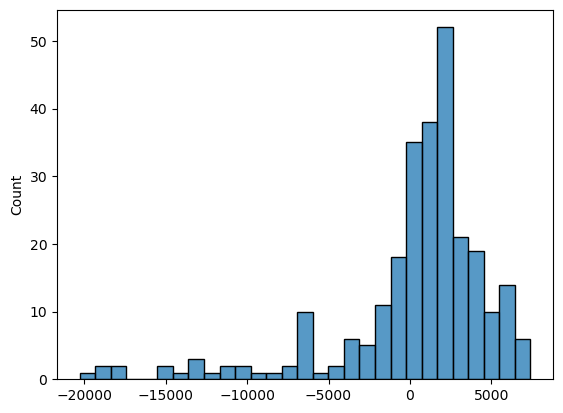

In [58]:
sns.histplot(data=error)

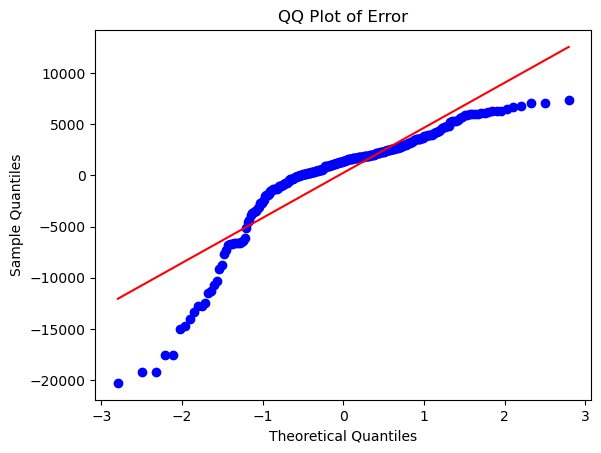

In [59]:
stats.probplot(error, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Error")
plt.show()

In [47]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size= 0.20, random_state=42)

In [48]:
decreg = DecisionTreeRegressor(max_depth=5,min_samples_leaf= 4,min_samples_split=14)

decreg.fit(X_train_dt, y_train_dt)

y_pred_train_dt = decreg.predict(X_train_dt)
y_pred_test_dt = decreg.predict(X_test_dt)


mse_train_dt = mean_squared_error(y_train_dt, y_pred_train_dt)
rmse_train_dt=np.sqrt(mse_train_dt)
mse_test_dt = mean_squared_error(y_test_dt, y_pred_test_dt)
rmse_test_dt=np.sqrt(mse_test_dt)
r2_train_dt = r2_score(y_train_dt, y_pred_train_dt)
r2_test_dt = r2_score(y_test_dt, y_pred_test_dt)

print("Train Set - RMSE:", rmse_train_dt)
print("Train Set - R-squared (R2):", r2_train_dt)
print("Test Set - RMSE:",rmse_test_dt )
print("Test Set - R-squared (R2):", r2_test_dt)

Train Set - RMSE: 4000.5567511653067
Train Set - R-squared (R2): 0.8426405724189889
Test Set - RMSE: 4171.280331752707
Test Set - R-squared (R2): 0.8397187385447216


In [61]:
import optuna
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 5, 18)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train_dt, y_train_dt)

    y_pred = regressor.predict(X_test_dt)

    mse_test = mean_squared_error(y_test_dt, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-29 13:34:43,484] A new study created in memory with name: no-name-02f58885-4fd5-44f0-b0c0-8b5111a3c5a2
[I 2023-06-29 13:34:43,501] Trial 0 finished with value: 4781.573380621078 and parameters: {'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 4781.573380621078.
[I 2023-06-29 13:34:43,513] Trial 1 finished with value: 4206.085840790974 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 4206.085840790974.
[I 2023-06-29 13:34:43,528] Trial 2 finished with value: 4892.920801817652 and parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 4206.085840790974.
[I 2023-06-29 13:34:43,539] Trial 3 finished with value: 4601.315123687117 and parameters: {'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 1 with value: 4206.085840790974.
[I 2023-06-29 13:34:43,552] Trial 4 finished with value: 5191.81609490

Best Parameters:  {'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 3}
Best Value:  4125.230829334872


In [50]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size= 0.20, random_state=42)

In [60]:
rfreg = RandomForestRegressor(n_estimators= 900,max_depth= 6,min_samples_split=6,min_samples_leaf=3)     
#(n_estimators=300,max_depth=5,min_samples_split=4,min_samples_leaf=2)

rfreg.fit(X_train_rf, y_train_rf)

y_pred_train_rf = rfreg.predict(X_train_rf)
y_pred_test_rf= rfreg.predict(X_test_rf)


rmse_train = np.sqrt(mean_squared_error(y_train_rf, y_pred_train_rf))
rmse_test = np.sqrt(mean_squared_error(y_test_rf, y_pred_test_rf))

r2_train = r2_score(y_train_rf, y_pred_train_rf)
r2_test = r2_score(y_test_rf, y_pred_test_rf)

rmsle_train= np.sqrt(np.mean(np.square(np.log1p(y_train_rf)-np.log1p(y_pred_train_rf))))
rmsle_test= np.sqrt(np.mean(np.square(np.log1p(y_test_rf)-np.log1p(y_pred_test_rf))))

print("Train Set - RMSE:", rmse_train)
print("Train Set - R-squared (R2):", r2_train)
print("Train Set - RMSLE:", rmsle_train)
print("Test Set - RMSE:",rmse_test )
print("Test Set - R-squared (R2):", r2_test)
print("Test Set - RMSLE:", rmsle_test)

Train Set - RMSE: 3663.863590127823
Train Set - R-squared (R2): 0.8680132035507239
Train Set - RMSLE: 0.3477504337712613
Test Set - RMSE: 4044.2832848815206
Test Set - R-squared (R2): 0.8493298802739228
Test Set - RMSLE: 0.401340833992016


In [52]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train_rf, y_train_rf)

    y_pred = regressor.predict(X_test_rf)

    mse_test = mean_squared_error(y_test_rf, y_pred)
    rmse_test=np.sqrt(mse_test)
    return rmse_test
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)

best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)

[I 2023-06-29 13:20:53,484] A new study created in memory with name: no-name-9edb13ae-a8e6-4b2d-b80f-649cda091c53
[I 2023-06-29 13:20:54,135] Trial 0 finished with value: 4061.5017602464927 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 4061.5017602464927.
[I 2023-06-29 13:20:55,577] Trial 1 finished with value: 4059.1142087761727 and parameters: {'n_estimators': 450, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 4059.1142087761727.
[I 2023-06-29 13:20:55,864] Trial 2 finished with value: 4097.086677757469 and parameters: {'n_estimators': 100, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 4059.1142087761727.
[I 2023-06-29 13:20:57,178] Trial 3 finished with value: 4091.7194317387098 and parameters: {'n_estimators': 450, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 4

Best Parameters:  {'n_estimators': 900, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3}
Best Value:  4048.3191741685478


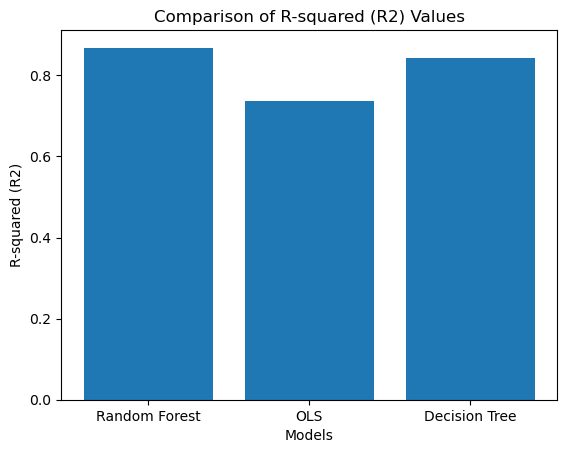

In [84]:
models = ['Random Forest', 'OLS','Decision Tree']
r2_values = [0.868, 0.737,  0.842]
plt.bar(models, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) Values')
plt.show()

In [85]:
data_new = X_train[:4]

In [92]:
Input_feature= data_new .drop("const", axis = 1)

In [93]:
rfreg.predict(Input_feature)

array([ 9631.52596433, 11546.24274885, 13629.70799226,  7972.39321435])

In [94]:
decreg.predict(Input_feature)

array([ 8142.54142857, 11801.60685185, 12271.64649235,  6458.47351064])

In [95]:
y_train[:4]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
Name: Expenses, dtype: float64